### Importación de datos



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 1. Análisis de facturación

In [2]:
tienda['ing_total'] = tienda['Precio'] - tienda['Costo de envío']
tienda2['ing_total'] = tienda2['Precio'] - tienda2['Costo de envío']
tienda3['ing_total'] = tienda3['Precio'] - tienda3['Costo de envío']
tienda4['ing_total'] = tienda4['Precio'] - tienda4['Costo de envío']

ganancias = {
    'Tienda 1': tienda['ing_total'] .sum(),
    'Tienda 2': tienda2['ing_total'] .sum(),
    'Tienda 3': tienda3['ing_total'] .sum(),
    'Tienda 4': tienda4['ing_total'] .sum()
}

In [28]:
ganancias_df = pd.DataFrame(list(ganancias.items()), columns=["Tienda", "Ingreso Total"])
ganancias_df["Ingreso Total (Mill)"] = ganancias_df["Ingreso Total"] / 1_000_000

In [29]:
ganancias_df = ganancias_df.sort_values(by="Ingreso Total", ascending=False)
ganancias_df

,Tienda,Ingreso Total,Ingreso Total (Mill)
0,Tienda 1,1.089502e+09,1089.5025
1,Tienda 2,1.056858e+09,1056.8584
2,Tienda 3,1.039503e+09,1039.5030
3,Tienda 4,9.830583e+08,983.0583


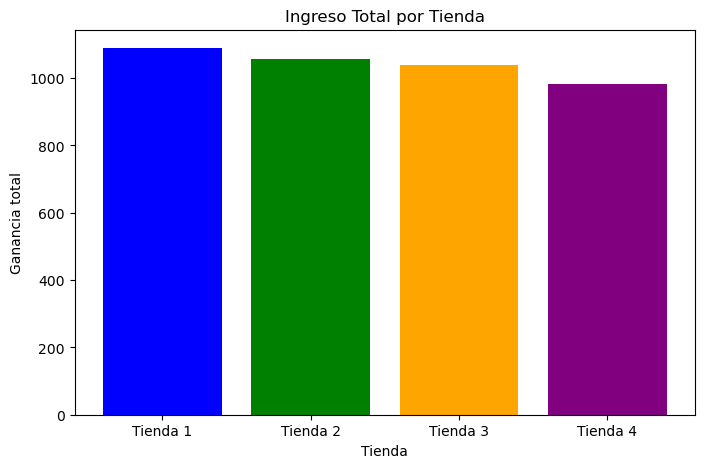

In [30]:
plt.figure(figsize=(8,5))
plt.bar(ganancias_df["Tienda"], ganancias_df["Ingreso Total (Mill)"], color=['blue', 'green', 'orange', 'purple'])
plt.title("Ingreso Total por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Ganancia total")
plt.show()

# 2. Ventas por categoría

In [6]:
t1 = tienda.groupby("Categoría del Producto")["Producto"].count().sort_values(ascending=False)
t2 = tienda2.groupby("Categoría del Producto")["Producto"].count().sort_values(ascending=False)
t3 = tienda3.groupby("Categoría del Producto")["Producto"].count().sort_values(ascending=False)
t4 = tienda4.groupby("Categoría del Producto")["Producto"].count().sort_values(ascending=False)


In [7]:
print(t1)

Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: Producto, dtype: int64


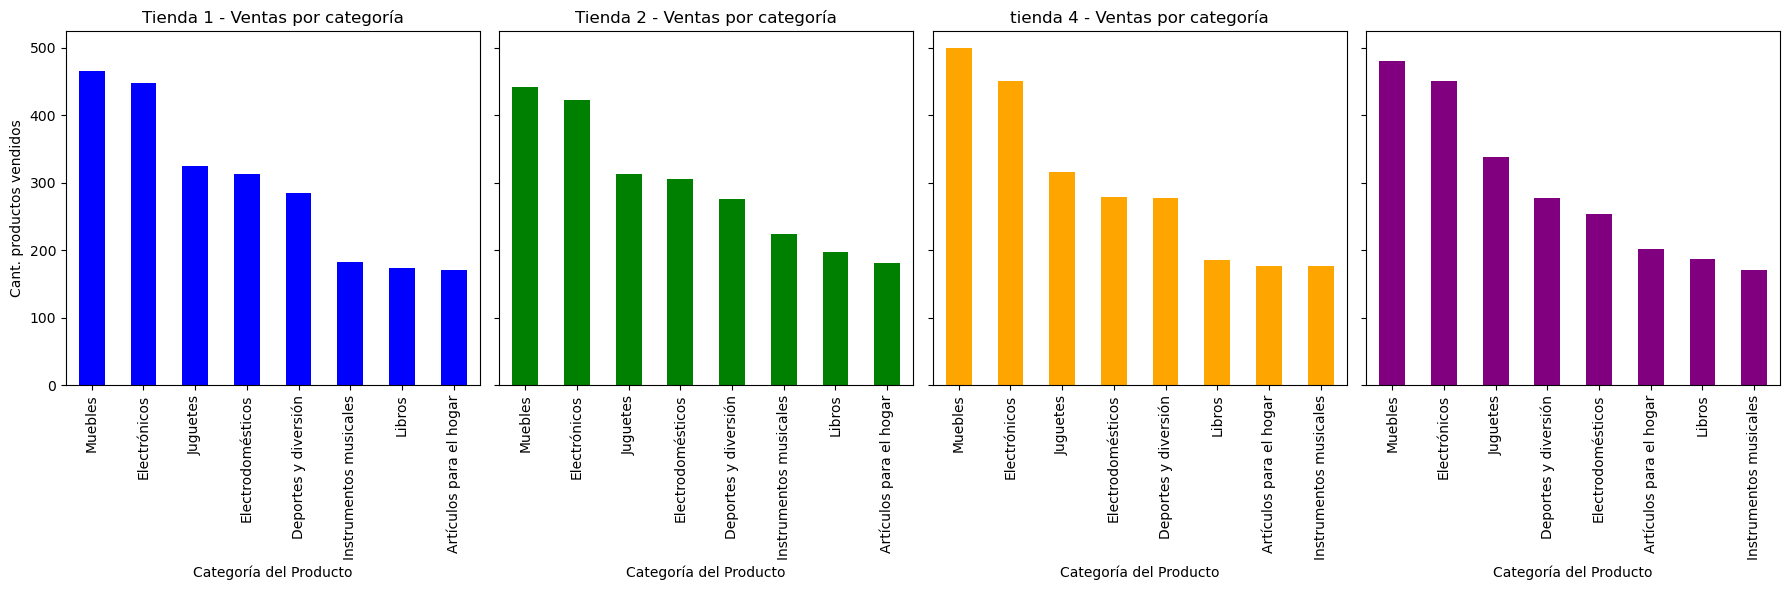

In [8]:
fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharey=True)

t1.plot(kind="bar", ax=axes[0], color="blue")
axes[0].set_title("Tienda 1 - Ventas por categoría")
axes[0].set_xlabel("Categoría del Producto")
axes[0].set_ylabel("Cant. productos vendidos")

t2.plot(kind="bar", ax=axes[1], color="green")
axes[1].set_title("Tienda 2 - Ventas por categoría")
axes[1].set_xlabel("Categoría del Producto")

t3.plot(kind="bar", ax=axes[2], color="orange")
axes[2].set_title("tienda 3 - Ventas por categoría")
axes[2].set_xlabel("Categoría del Producto")

t4.plot(kind="bar", ax=axes[3], color="purple")
axes[2].set_title("tienda 4 - Ventas por categoría")
axes[2].set_xlabel("Categoría del Producto")


plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [9]:
avg_ca = {
    "Tienda 1": tienda["Calificación"].mean(),
    "Tienda 2": tienda2["Calificación"].mean(),
    "Tienda 3": tienda3["Calificación"].mean(),
    "Tienda 4": tienda4["Calificación"].mean()
}

In [10]:
avg_ratings_df = pd.DataFrame(list(avg_ca.items()), columns=["Tienda", "Avg Calif"])

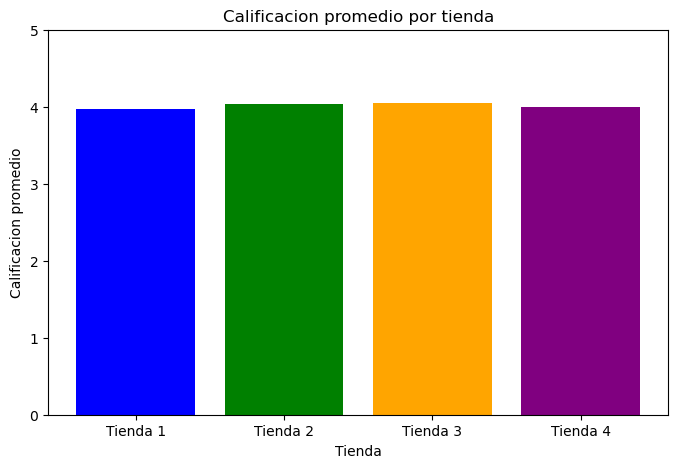

In [11]:
plt.figure(figsize=(8,5))
plt.bar(avg_ratings_df["Tienda"], avg_ratings_df["Avg Calif"], color=['blue', 'green', 'orange', 'purple'])
plt.title("Calificacion promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Calificacion promedio")
plt.ylim(0, 5)
plt.show()

# 4. Productos más y menos vendidos

In [31]:
def mas_menos_vendifos(df, nom_tienda, ax, ax_p):
    # contando ventas por producto
    cont_prod = df.groupby("Producto")["Producto"].count().sort_values(ascending=False)
    
    # Top 5 de los mejores
    mejores = cont_prod.head(5)
    
    # top 4 de los peores
    peores = cont_prod.tail(5)
    
    #print(f"\n{nom} - Best Selling Products:\n", best)
    #print(f"\n{shop_name} - Least Selling Products:\n", least)
    
    # Plot top 5
    mejores.plot(kind="bar", ax=ax, color='skyblue')
    ax.set_title(f"{nom_tienda} - Top 5 de productos mas vendidos")
    ax.set_xlabel("Producto")
    ax.set_ylabel("Conteo ventas")
    ax.tick_params(axis='x', rotation=45)

    peores.plot(kind="bar", ax=ax_p, color='orange')
    ax_p.set_title(f"{nom_tienda} - Top 5 de productos menos vendidos")
    ax_p.set_xlabel("Producto")
    ax_p.set_ylabel("Conteo ventas")
    ax_p.tick_params(axis='x', rotation=45)

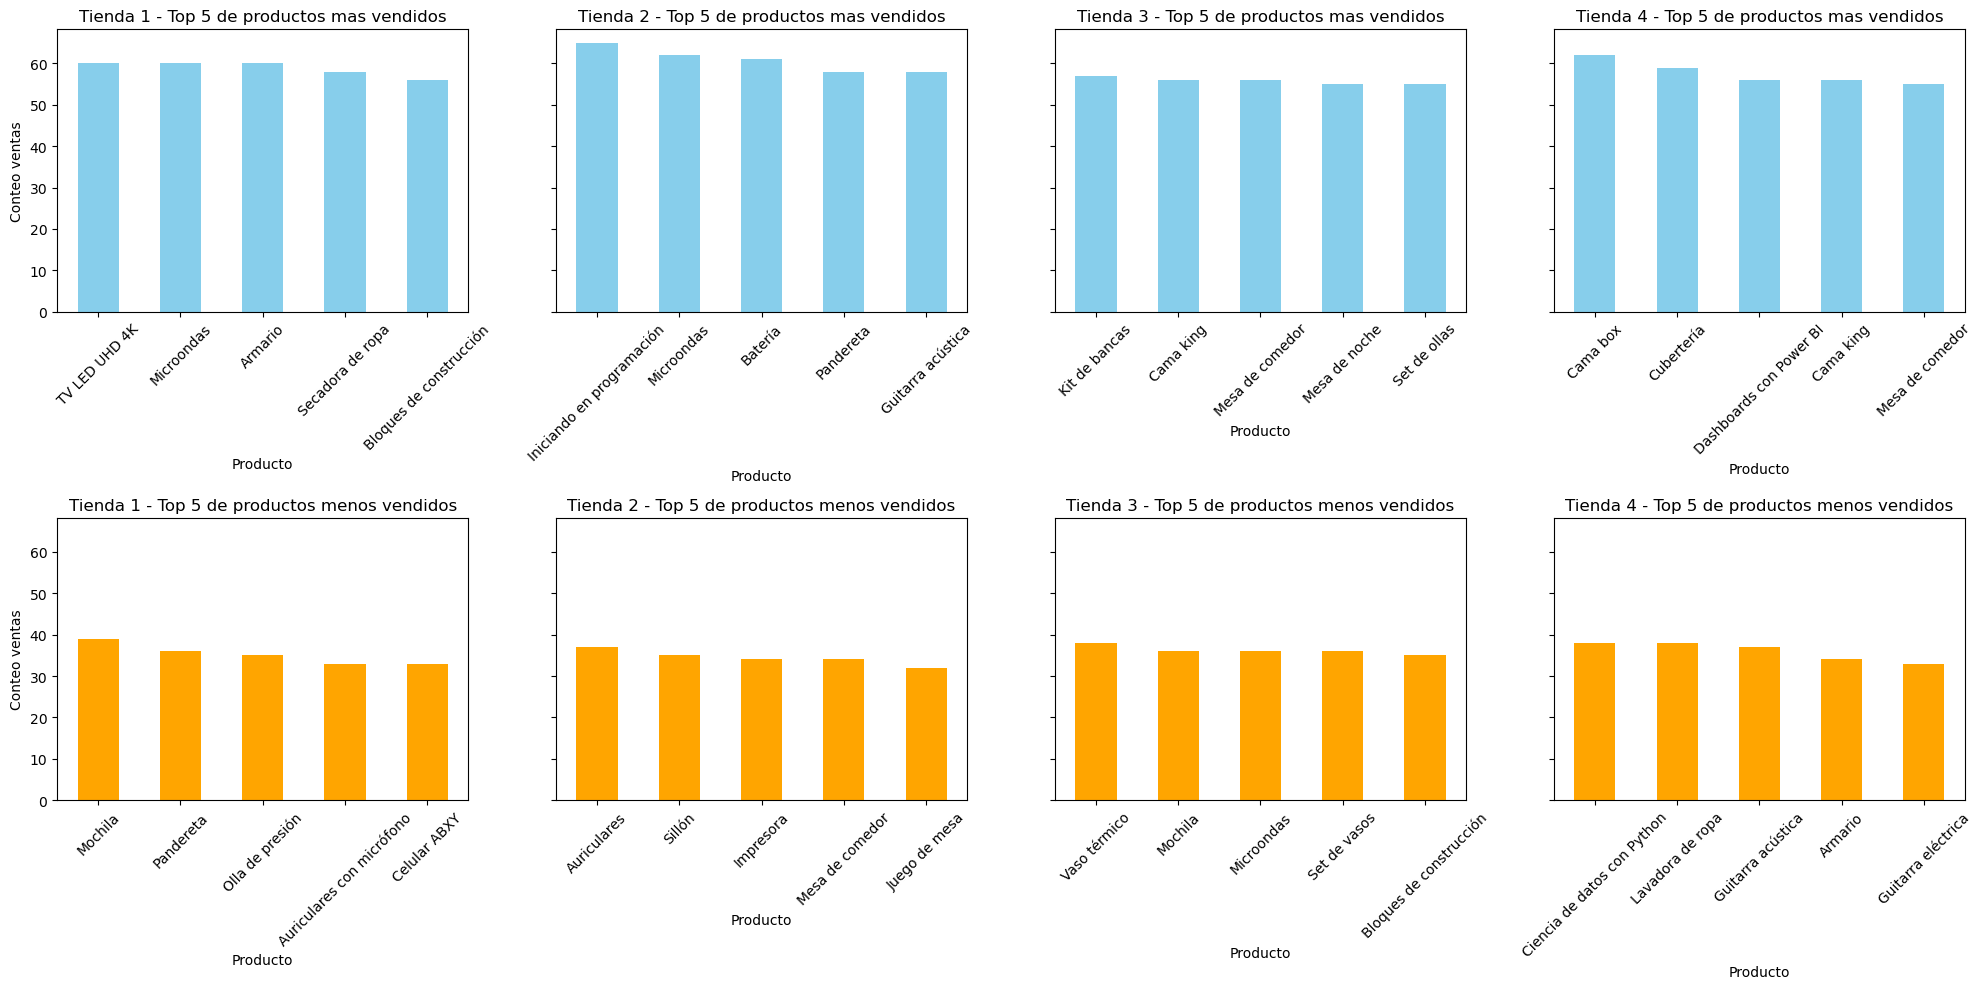

In [32]:
fig, axes = plt.subplots(2, 4, figsize=(20,10), sharey=True)

mas_menos_vendifos(tienda, "Tienda 1", axes[0,0], axes[1,0])
mas_menos_vendifos(tienda2, "Tienda 2", axes[0,1], axes[1,1])
mas_menos_vendifos(tienda3, "Tienda 3", axes[0,2], axes[1,2])
mas_menos_vendifos(tienda4, "Tienda 4", axes[0,3], axes[1,3])

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [14]:
costos = {
    'Tienda 1': tienda['Costo de envío'] .mean(),
    'Tienda 2': tienda2['Costo de envío'] .mean(),
    'Tienda 3': tienda3['Costo de envío'] .mean(),
    'Tienda 4': tienda4['Costo de envío'] .mean()
}

In [15]:
costos_df = pd.DataFrame(list(costos.items()), columns=["Tienda", "Costo promedio Total"])
#costos_df["Ingreso Total"] = costos_df["Ingreso Total"].apply(lambda x: f"{x:,.0f}")

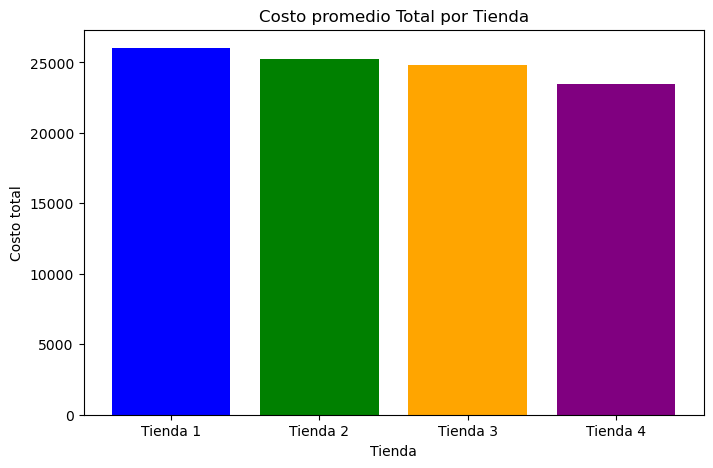

In [16]:
plt.figure(figsize=(8,5))
plt.bar(costos_df["Tienda"], costos_df["Costo promedio Total"], color=['blue', 'green', 'orange', 'purple'])
plt.title("Costo promedio Total por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Costo total")
plt.show()

# Informe final

<h4>Introducción</h4>
<h5>El propósito de este análisis es evaluar el desempeño de 4 tiendas basado en sus datos de ventas. Cada conjunto de datos incluye información crucial para los negocios del Sr. Juan como la categría de productos, calificaciones de los clientes, precio y coste de envio de los productos, fecha y el vendedor encargado de la venta. Al examinar esta información, el objetivo es comprender la rentabilidad de cada tienda, la calificación de los clientes, la popularidad de la categoría de productos e identificar los productos más y menos populares.</h5>

<h4>Análisis individual</h4>
<ul>
<li><h5>Análisis de facturación: De acuerdo con los resultados, la tienda que más ingresos aporta a el negocio del Sr. Juan es la #01, teniendo el mayor de los ingresos. Sin embargo, las otras tiendas tienen niveles similares de ganancia por lo tanto, no sería necesario hacer una nueva localización de locales.</h5></li>
<li><h5>Ventas por categoría: De acuerdo con los resultados, las categorías de productos con mayor demanda son los muebles y eléctronicos, teniendo una mayor incidencia en las tiendas 3 y 4. Los productos con menos demanda son los libros y artículos del hogar. Se recomienda que el Sr. Juan incremente el stock en cada una de sus tiendas de las categorías antes mencionadad y, en dado caso de que se quiera invertir en categorías menos solicitadas(libros y art. del hogar), se resalta que sería necesario hacer inversiones en promociones para atraer a posibles clientes.</h5></li>
<li><h5>Calificación promedio de la tienda: En base a los datos, todas las tiendas tienen muy buenas evaluaciones, y en este caso se recomienda que se mantega la calidad de las mismas para seguir procurando los buenos resultados y la satisfacción de los clientes.</h5></li>
<li><h5>Productos más y menos vendidos: los productos más vendidos son los electrodomésticos, equipos electrónicos tanto personales como del hogar. Los menos vendidos corresponden a áreas variadas como materiales de cocina, instrumentos y artefactos de almacenaje.</h5></li>
<li><h5>Envío promedio por tienda: De acuerdo con los resultados, la tienda que más costos de envio tiene es la #01(lo que se relaciona también con que es la que más vende) pero, al igual que en casos anteriores, las otras tiendas tienen costos similares.</h5></li>
</ul>


<h4>Conclusión de análisis</h4>
<h5>Se recomienda que el Sr. Juan invierta aún más en equipos eléctricos y muebles debido a que en todas las tiendas existe mucha demanda por estos artículos. Como precaución, no es recomendable que invierta en artículos de menos demanda como artículos del hogar ya que representaría un riesgo por su bajo consume. Se recomienda que este invierta también en otros productos como los electrodomésticos por su gran cantidad de compras en todas las tiendas</h5>
